In [958]:
import pandas as pd
import urllib.request

In [959]:
url = ('https://opendata.arcgis.com/datasets/e5ceebe7edba44cc8f875ca54cc2341a_0/FeatureServer/0/query?outFields=*&where=1%3D1')

In [960]:
with urllib.request.urlopen(url) as response:
  my_json = response.read()

In [961]:
my_json

b'{"objectIdFieldName":"OBJECTID","uniqueIdField":{"name":"OBJECTID","isSystemMaintained":true},"globalIdFieldName":"","hasZ":false,"hasM":false,"spatialReference":{"wkid":4326},"fields":[{"name":"OBJECTID","type":"esriFieldTypeOID","alias":"OBJECTID","sqlType":"sqlTypeInteger","domain":null,"defaultValue":null},{"name":"date","type":"esriFieldTypeString","alias":"date","sqlType":"sqlTypeOther","domain":null,"defaultValue":null,"length":128},{"name":"cumulativecases_specimen","type":"esriFieldTypeInteger","alias":"cumulativecases_specimen","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"dailycases_specimen","type":"esriFieldTypeInteger","alias":"dailycases_specimen","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"cumulativedeaths_date","type":"esriFieldTypeInteger","alias":"cumulativedeaths_date","sqlType":"sqlTypeOther","domain":null,"defaultValue":null},{"name":"dailydeaths_date","type":"esriFieldTypeInteger","alias":"dailydeaths_date","sqlTy

In [962]:
from pandas import DataFrame
import json

In [963]:
data = json.loads(my_json)
data['features']

refactored_data = []

for attribute in data['features']:
  refactored_data.append(attribute['attributes'])
refactored_data

[{'OBJECTID': 0,
  'cumulativecases_specimen': 1,
  'cumulativedeaths_date': 0,
  'cumulativepcr_specimen': 0,
  'cumulativesero_specimen': 0,
  'dailycases_specimen': 1,
  'dailydeaths_date': 0,
  'dailypcr_specimen': 0,
  'dailysero_specimen': 0,
  'date': '1/22/2020',
  'hospital_cases': 0,
  'icu_cases': 0,
  'inmate_cases': 0,
  'inmate_dths': 0,
  'peh_cases': 0,
  'peh_dths': 0,
  'snf_cases': 0,
  'snf_dths': 0},
 {'OBJECTID': 1,
  'cumulativecases_specimen': 1,
  'cumulativedeaths_date': None,
  'cumulativepcr_specimen': None,
  'cumulativesero_specimen': None,
  'dailycases_specimen': 0,
  'dailydeaths_date': None,
  'dailypcr_specimen': None,
  'dailysero_specimen': None,
  'date': '1/23/2020',
  'hospital_cases': None,
  'icu_cases': None,
  'inmate_cases': None,
  'inmate_dths': None,
  'peh_cases': None,
  'peh_dths': None,
  'snf_cases': None,
  'snf_dths': None},
 {'OBJECTID': 2,
  'cumulativecases_specimen': 1,
  'cumulativedeaths_date': None,
  'cumulativepcr_specimen

In [964]:
df = DataFrame(refactored_data)

In [965]:
df.head()

,date,cumulativecases_specimen,dailycases_specimen,cumulativedeaths_date,dailydeaths_date,dailypcr_specimen,cumulativepcr_specimen,dailysero_specimen,cumulativesero_specimen,hospital_cases,icu_cases,snf_cases,inmate_cases,peh_cases,snf_dths,inmate_dths,peh_dths,OBJECTID
0,1/22/2020,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1/23/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1/24/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1/25/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1/26/2020,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [966]:
df.tail()

,date,cumulativecases_specimen,dailycases_specimen,cumulativedeaths_date,dailydeaths_date,dailypcr_specimen,cumulativepcr_specimen,dailysero_specimen,cumulativesero_specimen,hospital_cases,icu_cases,snf_cases,inmate_cases,peh_cases,snf_dths,inmate_dths,peh_dths,OBJECTID
184,7/24/2020,34657.0,52.0,580.0,0.0,1481.0,397324.0,23.0,49300.0,685.0,203.0,1515.0,464.0,129.0,247.0,0.0,1.0,184
185,7/25/2020,34676.0,19.0,580.0,0.0,1123.0,398447.0,1.0,49301.0,687.0,201.0,1516.0,464.0,130.0,247.0,0.0,1.0,185
186,7/26/2020,34688.0,12.0,581.0,1.0,831.0,399278.0,5.0,49306.0,661.0,204.0,1516.0,464.0,130.0,248.0,0.0,1.0,186
187,7/27/2020,34691.0,3.0,NaN,NaN,146.0,399424.0,NaN,NaN,640.0,203.0,1516.0,465.0,130.0,248.0,0.0,1.0,187
188,7/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1556.0,465.0,136.0,253.0,0.0,1.0,188


In [967]:
def removeNaN(df):
  for i in range(len(df)):
    if str(df[i]) == 'nan':
      df.pop(i)
  return df

In [968]:
df1 = removeNaN(df.reset_index()['dailycases_specimen'])#removing  NaN(not numbers) elements

df1.shape

(188,)

In [969]:
df1

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
183    101.0
184     52.0
185     19.0
186     12.0
187      3.0
Name: dailycases_specimen, Length: 188, dtype: float64

In [970]:
df['dailycases_specimen']

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
184    52.0
185    19.0
186    12.0
187     3.0
188     NaN
Name: dailycases_specimen, Length: 189, dtype: float64

In [971]:
import matplotlib.pyplot as plt


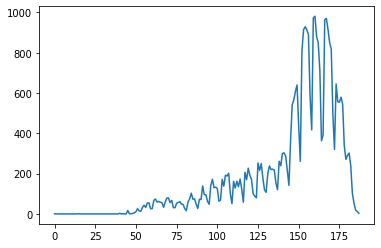

In [972]:
plt.plot(df1)

In [973]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [974]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 =scaler.fit_transform(np.array(df1).reshape(-1,1))

df1

array([[0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0030581 ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.01732926],
       [0.00101937],
       [0.001

In [975]:
df1.shape

(188, 1)

In [976]:
train_percent = 0.60# train_precent:1-train_percent train-test split  was 0.70

training_size = int(len(df1)*train_percent)
test_size = len(df1)-training_size

train_data = df1[0:training_size,:]

test_data = df1[training_size:,:1]

In [977]:
training_size,test_size

(112, 76)

In [978]:
train_data

array([[0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.0030581 ],
       [0.        ],
       [0.00101937],
       [0.        ],
       [0.        ],
       [0.01732926],
       [0.00101937],
       [0.001

In [979]:
test_data

array([[0.16513761],
       [0.13761468],
       [0.17635066],
       [0.12538226],
       [0.05912334],
       [0.21100917],
       [0.17329256],
       [0.23139653],
       [0.19571865],
       [0.17533129],
       [0.1019368 ],
       [0.08970438],
       [0.08154944],
       [0.2579001 ],
       [0.22018349],
       [0.254842  ],
       [0.18042813],
       [0.12232416],
       [0.10907238],
       [0.20285423],
       [0.24260958],
       [0.22426096],
       [0.22629969],
       [0.22222222],
       [0.15698267],
       [0.12232416],
       [0.26605505],
       [0.24362895],
       [0.3058104 ],
       [0.3088685 ],
       [0.29255861],
       [0.22120285],
       [0.14475025],
       [0.36697248],
       [0.55147808],
       [0.57696228],
       [0.61977574],
       [0.65239551],
       [0.44444444],
       [0.26605505],
       [0.82568807],
       [0.93170234],
       [0.94699286],
       [0.93170234],
       [0.90621814],
       [0.59531091],
       [0.42507645],
       [0.991

In [980]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [], []

  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [981]:
time_step = 2# was 2

X_train,y_train = create_dataset(train_data,time_step)

X_test,y_test = create_dataset(test_data,time_step)

In [982]:
X_train.shape

(109, 2)

In [983]:
X_test.shape

(73, 2)

In [984]:
#reshape input to be [samples,time steps,features], a requirement for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [985]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM  


In [986]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [987]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_71 (LSTM)               (None, 2, 50)             10400     
_________________________________________________________________
lstm_72 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
lstm_73 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [988]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)#batch size was 64 , epochs was 100

Epoch 1/100
2/2 [==============================] - 1s 563ms/step - loss: 0.0043 - val_loss: 0.2477
Epoch 2/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0035 - val_loss: 0.2366
Epoch 3/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0030 - val_loss: 0.2258
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0027 - val_loss: 0.2161
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0027 - val_loss: 0.2090
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0028 - val_loss: 0.2056
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0028 - val_loss: 0.2058
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0028 - val_loss: 0.2076
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0027 - val_loss: 0.2106
Epoch 10/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0026 - val_loss: 0.2130
Epoch 11/100
2/2 [

First our model was overfitting (training loss decreased while validation loss increased) However, validation loss began to decrease, which resulted in a better model)

In [989]:
train_predict = model.predict(X_train)#will give the corresponding predicted y_train values
test_predict = model.predict(X_test)# will give the correspinding y_test values

#we will need to compare these values with y_train and y_test to guage accuracy


In [990]:
#transforming back to original form (from a value b/w 0 and 1 to the actual number of daily cases)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [991]:
import math
from sklearn.metrics import mean_squared_error

In [992]:
math.sqrt(mean_squared_error(y_train,train_predict)) # was 78.33284474245686

58.271866194872814

In [993]:
math.sqrt(mean_squared_error(y_test,test_predict)) # was 478.76947420348716

386.0375406085735

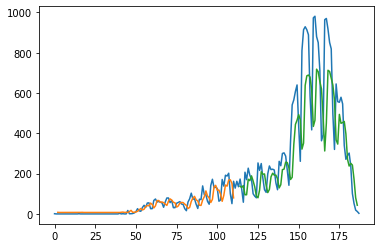

In [994]:
##now plotting

look_back = time_step  #basically our timestep--> we use the last time_step points to make  a prediction on the next data point

#shift train predictions for plotting (orange)
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting(green)
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len( df1)-1,:] = test_predict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))#blue
plt.plot(trainPredictPlot)#orange
plt.plot(testPredictPlot)#green
plt.show()


In [995]:
from numpy import array


def makePrediction(days):
  x_input = test_data[len(test_data)-time_step:].reshape(1,-1)
  temp_input = list(x_input)
  temp_input = temp_input[0].tolist()
  output = []
  for i in range(days):

    if len(temp_input) > time_step:
      x_input = np.array(temp_input[1:])
      x_input = x_input.reshape(1,-1)
      x_input = x_input.reshape((1,time_step,1))
      yhat = model.predict(x_input,verbose=0)
      temp_input.extend(yhat[0].tolist())
      temp_input = temp_input[1:]
      output.extend(yhat.tolist())
    else:
      x_input = x_input.reshape((1,time_step,1))
      yhat = model.predict(x_input,verbose=0)
      temp_input.extend(yhat[0].tolist())
      output.extend(yhat.tolist())
 
  return output



In [996]:
predictions  = makePrediction(30)

day_new = np.arange(1,1+len(predictions))
day_pred = np.arange(1+len(predictions),1+2*len(predictions))

In [997]:
len(df1)

188

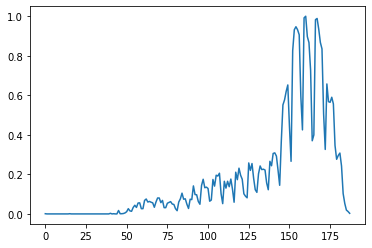

In [998]:
#plt.plot(day_new,scaler.inverse_transform(df1))
#plt.plot(day_pred,scaler.inverse_transform(predictions))

#this is without the predictions

plt.plot(df1)



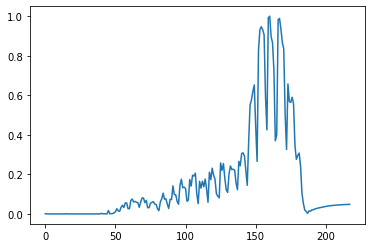

In [999]:
df2 = df1.tolist()
df2.extend(predictions)
plt.plot(df2)
#this is with the predictions, so the model predicts that it will flatline 


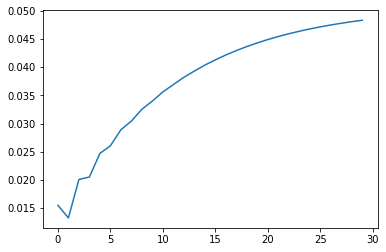

In [1000]:
plt.plot(predictions)#this is the curve of the predictions zoomed in 

In [1001]:
scaler.inverse_transform(predictions)

array([[15.18859947],
       [12.99035702],
       [19.69415139],
       [20.12789602],
       [24.23815789],
       [25.56539727],
       [28.35882963],
       [29.87472395],
       [31.93100148],
       [33.36661718],
       [34.96213961],
       [36.2295638 ],
       [37.50662128],
       [38.59083028],
       [39.63055658],
       [40.54395745],
       [41.398031  ],
       [42.1615787 ],
       [42.86633264],
       [43.50202365],
       [44.08484852],
       [44.6129325 ],
       [45.0954155 ],
       [45.53358025],
       [45.93317897],
       [46.29647379],
       [46.62747005],
       [46.92855415],
       [47.20273009],
       [47.45219058]])

In [1002]:
new_df = removeNaN(df.reset_index()['cumulativecases_specimen'])
index = len(new_df) - 1
for i in range(len(predictions)):
  new_df[index + i + 1] = new_df[index] + scaler.inverse_transform(predictions)[i][0] 

new_df[184:]

184    34657.000000
185    34676.000000
186    34688.000000
187    34691.000000
188    34706.188599
189    34703.990357
190    34710.694151
191    34711.127896
192    34715.238158
193    34716.565397
194    34719.358830
195    34720.874724
196    34722.931001
197    34724.366617
198    34725.962140
199    34727.229564
200    34728.506621
201    34729.590830
202    34730.630557
203    34731.543957
204    34732.398031
205    34733.161579
206    34733.866333
207    34734.502024
208    34735.084849
209    34735.612932
210    34736.095415
211    34736.533580
212    34736.933179
213    34737.296474
214    34737.627470
215    34737.928554
216    34738.202730
217    34738.452191
Name: cumulativecases_specimen, dtype: float64

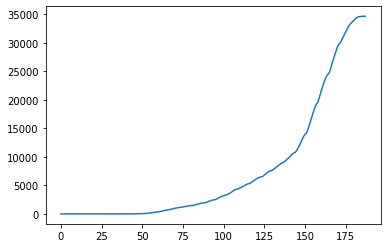

In [1003]:
plt.plot(df['cumulativecases_specimen']) # this is the current curve

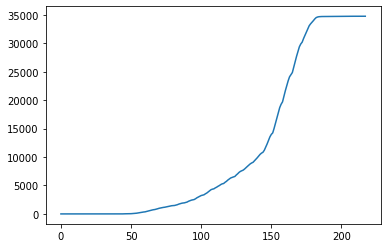

In [1004]:
plt.plot(new_df) # this is the new curve with the prediction

The actual curve is flattening out just like we predicted with our prediction curve